In [1]:
import numpy as np
import pandas as pd
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
%matplotlib inline

In [48]:
marketing_data = pd.read_csv('https://cdn.upgrad.com/UpGrad/temp/118ef38a-5252-405f-bcab-a832c238cc88/bankmarketing.csv')
marketing_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [49]:
marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [50]:
marketing_data.shape

(41188, 21)

In [51]:
bank_marketing = marketing_data.drop(columns=[
    'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
    'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'
], axis=1)

In [52]:
bank_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 11 columns):
age            41188 non-null int64
job            41188 non-null object
marital        41188 non-null object
education      41188 non-null object
default        41188 non-null object
housing        41188 non-null object
loan           41188 non-null object
contact        41188 non-null object
month          41188 non-null object
day_of_week    41188 non-null object
poutcome       41188 non-null object
dtypes: int64(1), object(10)
memory usage: 3.5+ MB


In [53]:
bank_marketing['age_bin'] = pd.cut(bank_marketing['age'],
                              [0, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                              labels=[
                                  '0-20', '20-30', '30-40', '40-50', '50-60',
                                  '60-70', '70-80', '80-90', '90-100'
                              ])
marketing_data['age_bin'] = bank_marketing['age_bin']
bank_marketing.drop(columns=['age'], axis=1, inplace=True)
marketing_data.drop(columns=['age'], axis=1, inplace=True)

In [54]:
bank_marketing.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,50-60
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,50-60
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,30-40
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,30-40
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,50-60


In [55]:
marketing_data.describe()

,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [56]:
encoder = LabelEncoder()
bank_marketing = bank_marketing.apply(encoder.fit_transform)

In [57]:
bank_marketing.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,3,1,0,0,0,0,1,6,1,1,4
1,7,1,3,1,0,0,1,6,1,1,4
2,7,1,3,0,2,0,1,6,1,1,2
3,0,1,1,0,0,0,1,6,1,1,2
4,7,1,3,0,0,2,1,6,1,1,4


In [58]:
# ===> apply label encoder to marketing data 
_encoder = LabelEncoder()
_cols = bank_marketing.columns
marketing_data[_cols] = marketing_data[_cols].apply(_encoder.fit_transform)
marketing_data.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_bin
0,3,1,0,0,0,0,1,6,1,261,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no,4
1,7,1,3,1,0,0,1,6,1,149,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no,4
2,7,1,3,0,2,0,1,6,1,226,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no,2
3,0,1,1,0,0,0,1,6,1,151,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no,2
4,7,1,3,0,0,2,1,6,1,307,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no,4


In [59]:
marketing_data.drop('y', axis=1, inplace=True)

In [60]:
list(_continues_columns)

['euribor3m',
 'pdays',
 'previous',
 'duration',
 'cons.price.idx',
 'emp.var.rate',
 'cons.conf.idx',
 'nr.employed',
 'campaign']

In [61]:
# ===> Scale continues variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
_continues_columns = list( set(marketing_data.columns) - set(bank_marketing.columns) )
marketing_data[_continues_columns] = scaler.fit_transform(marketing_data[_continues_columns])
marketing_data.head()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,age_bin
0,3,1,0,0,0,0,1,6,1,0.010471,-0.565922,0.195414,-0.349494,1,0.648092,0.722722,0.886447,0.71246,0.33168,4
1,7,1,3,1,0,0,1,6,1,-0.421501,-0.565922,0.195414,-0.349494,1,0.648092,0.722722,0.886447,0.71246,0.33168,4
2,7,1,3,0,2,0,1,6,1,-0.124520,-0.565922,0.195414,-0.349494,1,0.648092,0.722722,0.886447,0.71246,0.33168,2
3,0,1,1,0,0,0,1,6,1,-0.413787,-0.565922,0.195414,-0.349494,1,0.648092,0.722722,0.886447,0.71246,0.33168,2
4,7,1,3,0,0,2,1,6,1,0.187888,-0.565922,0.195414,-0.349494,1,0.648092,0.722722,0.886447,0.71246,0.33168,4


## EDA:

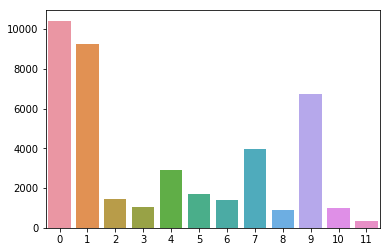

In [62]:
tmp = bank_marketing['job'].value_counts()
sns.barplot(x=tmp.index, y=tmp.values)

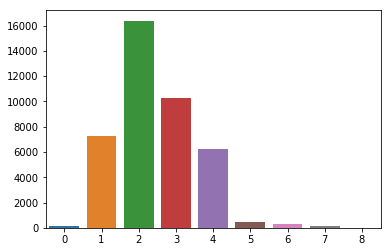

In [63]:
tmp = bank_marketing['age_bin'].value_counts()
sns.barplot(x=tmp.index, y=tmp.values)

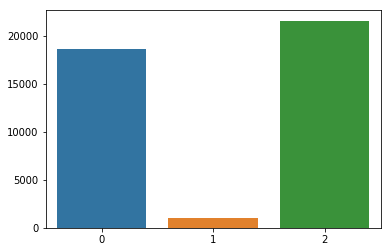

In [64]:
tmp = bank_marketing['housing'].value_counts()
sns.barplot(x=tmp.index, y=tmp.values)

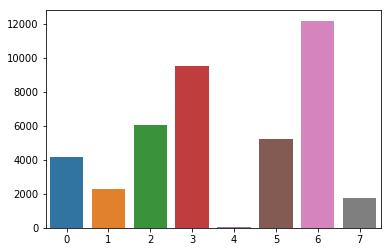

In [65]:
tmp = bank_marketing['education'].value_counts()
sns.barplot(x=tmp.index, y=tmp.values)

## Using K-Mode using "cao" initialization:

In [66]:
help(KModes)

Help on class KModes in module kmodes.kmodes:

class KModes(sklearn.base.BaseEstimator, sklearn.base.ClusterMixin)
 |  KModes(n_clusters=8, max_iter=100, cat_dissim=<function matching_dissim at 0xa1637dbf8>, init='Cao', n_init=1, verbose=0, random_state=None, n_jobs=1)
 |  
 |  k-modes clustering algorithm for categorical data.
 |  
 |  Parameters
 |  -----------
 |  n_clusters : int, optional, default: 8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  max_iter : int, default: 300
 |      Maximum number of iterations of the k-modes algorithm for a
 |      single run.
 |  
 |  cat_dissim : func, default: matching_dissim
 |      Dissimilarity function used by the k-modes algorithm for categorical variables.
 |      Defaults to the matching dissimilarity function.
 |  
 |  init : {'Huang', 'Cao', 'random' or an ndarray}, default: 'Cao'
 |      Method for initialization:
 |      'Huang': Method in Huang [1997, 1998]
 |      'Cao': Met

In [67]:
_cluster = KModes(n_clusters=2, n_jobs=-1, init='Cao', verbose=1)
fitClusters_cao = _cluster.fit_predict(bank_marketing)

In [68]:
fitClusters_cao

array([1, 1, 0, ..., 0, 1, 0], dtype=uint16)

In [69]:
clusterCentroidsDf = pd.DataFrame(_cluster.cluster_centroids_)
clusterCentroidsDf.columns = bank_marketing.columns
clusterCentroidsDf

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,0,1,6,0,2,0,0,6,2,1,2
1,1,1,3,0,0,0,1,6,0,1,3


## Using K-Prototype using "cao" initialization:

In [70]:
from kmodes.kprototypes import KPrototypes

In [71]:
proto = KPrototypes(n_clusters=5, init='Cao')
_cluster = proto.fit_predict(marketing_data.as_matrix(), categorical=[0,1,2,3,4,5,6,7,8,9])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [72]:
_cluster

array([4, 4, 4, ..., 2, 2, 2], dtype=uint16)

In [73]:
marketing_data['clusters'] = _cluster

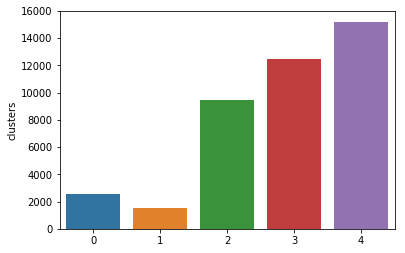

In [74]:
bankcluster = pd.DataFrame(marketing_data['clusters'].value_counts())
sns.barplot(x=bankcluster.index, y=bankcluster['clusters'])

In [75]:
marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
job               41188 non-null int64
marital           41188 non-null int64
education         41188 non-null int64
default           41188 non-null int64
housing           41188 non-null int64
loan              41188 non-null int64
contact           41188 non-null int64
month             41188 non-null int64
day_of_week       41188 non-null int64
duration          41188 non-null float64
campaign          41188 non-null float64
pdays             41188 non-null float64
previous          41188 non-null float64
poutcome          41188 non-null int64
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
age_bin           41188 non-null int64
clusters          41188 non-null uint16
dtypes: float64(9), int64(11), uint16(1)
memory usage

In [76]:
marketing_data.shape

(41188, 21)

In [1]:
import fancyimpute

Using TensorFlow backend.
